In [ ]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import torch
from MasterThesis.models.classification.randominit import LinearClassifier
from MasterThesis.models.classification.simclr import SimCLR
from MasterThesis.EDA import read_numpy_image
import matplotlib.pyplot as plt

/home/omarcastano/.pyenv/versions/3.7.13/envs/MasterThesis/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model = SimCLR(backbone="resnet18")

In [ ]:
from lightly.loss import NTXentLoss

img1 = model(torch.rand(128, 3, 100, 100))
img2 = model(torch.rand(128, 3, 100, 100) + torch.rand(128, 3, 100, 100))

loss = NTXentLoss(temperature=0.1)

loss(img1, img1)

tensor(0.0157, grad_fn=<NllLossBackward0>)

In [ ]:
from torchvision import transforms

# Data loader
def data_augmentation(img, min_max_croped_size):

    """
    Data augmentation for such as vertical and horizontal flip,
    random rotation and random sized crop.

    Argumetns:
        image: 3D numpy array
            input image with shape (H,W,C)
        label: 1D numpy array
            labels with shape (H,W)
        input_size: list [H,W].
            python list with the width and heigth
            of the output images and labels.
            example: input_size=[100,100]
    """


    img = torch.from_numpy(img.astype(np.float32)/255)

    augmentation = transforms.Compose(
        [
            transforms.RandomHorizontalFlip(),
            transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),
            transforms.RandomApply([transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)], p=0.8),
            transforms.RandomGrayscale(p=0.5),
            transforms.GaussianBlur(kernel_size=5),
        ]
    )

    img1 = augmentation(img)

    return img1

In [ ]:
img = read_numpy_image("/mnt/h/Mi unidad/Maestria/Theses/CIFAR/Images/cat/9.npz")

In [ ]:
(img/255).dtype

dtype('float64')

In [ ]:
img1, img2 = data_augmentation(img, min_max_croped_size=10)

In [ ]:
img1.max()

tensor(1.)

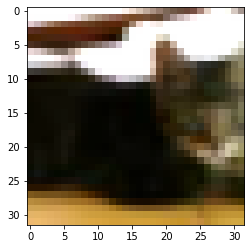

In [ ]:
plt.imshow(img1.numpy().transpose(1,2,0))

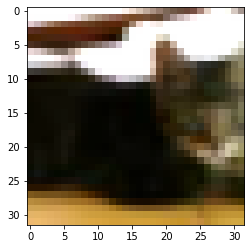

In [ ]:
plt.imshow(img1.numpy().transpose(1,2,0))

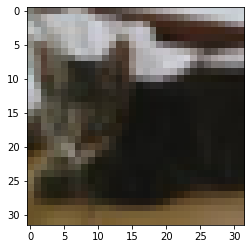

In [ ]:
plt.imshow(img[:3].transpose(1,2,0))

In [ ]:
img

(np.clip(img[:3], 0, 255) == img).all()

True

In [ ]:
import torchvision

In [ ]:
torchvision.models.resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
ds = sns.load_dataset("diamonds")

ds_train, ds_test = train_test_split(ds, train_size=0.2, test_size=0.2)

In [10]:
ds.shape

(53940, 10)

In [11]:
ds_train.shape

(10788, 10)

In [12]:
ds_test.shape

(10788, 10)